# Area de Testes

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import sys

pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/flowers")
arquivo = os.listdir(pasta)


print("Foram carregados {} arquivos".format(len(arquivo)))

Foram carregados 603 arquivos


In [ ]:
def imagem(n):
  imagemi = cv2.imread(os.path.join(pasta,arquivo[n]))
  plt.imshow(imagemi)
  plt.show()

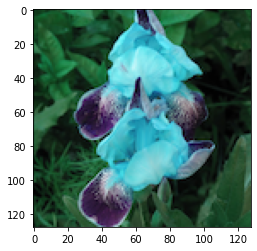

In [ ]:
imagem(1)

In [ ]:
def binario(n):
  imagemf = arquivo[n] + "desc"
  imagemi = cv2.imread(os.path.join(pasta,arquivo[n]))
  imagemf = cv2.cvtColor(imagemi, cv2.COLOR_BGR2GRAY)
  (thresh, imagem) = cv2.threshold(imagemf, 127, 255, cv2.THRESH_BINARY)
  plt.imshow(imagem)
  plt.show()
  imagem = cv2.resize(imagem, (64,64), interpolation = cv2.INTER_AREA)
  plt.imshow(imagem)
  plt.show()

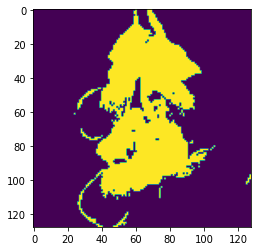

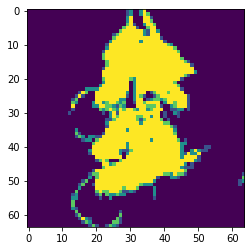

In [ ]:
binario(1)

In [ ]:
def binario2(n):
  imagemf = arquivo[n] + "desc"
  imagemi = cv2.imread(os.path.join(pasta,arquivo[n]))
  imagemf = cv2.cvtColor(imagemi, cv2.COLOR_BGR2GRAY)
  print("Formato da imagem {}".format(imagemf.shape))
  with np.nditer(imagemf, op_flags=['readwrite']) as imagem:
    for pixel in imagem:
      if pixel > 127:
        pixel[...] = True
      else:
        pixel[...] = False  
  plt.imshow(imagemf)
  plt.show()

Formato da imagem (128, 128)


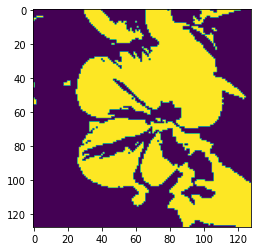

In [ ]:
binario2(1)

In [ ]:
def cinza(n):
  arquivocinza = arquivo[n] + "desc"
  imagemi = cv2.imread(os.path.join(pasta,arquivo[n]))
  imagemi2 = cv2.resize(imagemi, (32,32), interpolation = cv2.INTER_NEAREST)
  imagemi3 = cv2.resize(imagemi, (32,32), interpolation = cv2.INTER_LINEAR)
  imagemcinza = cv2.cvtColor(imagemi, cv2.COLOR_BGR2GRAY)
  cv2.imwrite("imagem.png",imagemcinza)

  plt.imshow(imagemcinza, cmap = plt.cm.binary)
  plt.show()



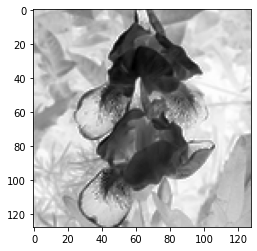

In [ ]:
cinza(1)

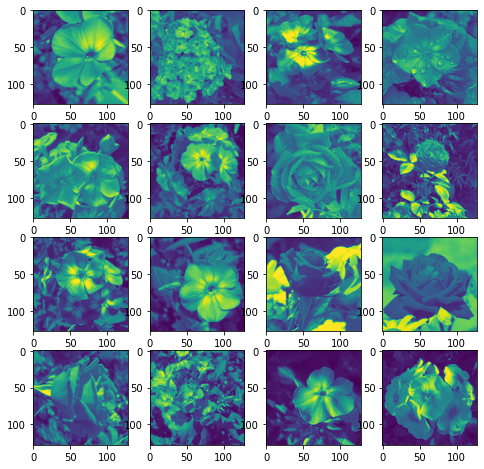

In [ ]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    imagemf = arquivo[i] + "desc"
    imagemi = cv2.imread(os.path.join(pasta,arquivo[i]))
    imagemf = cv2.cvtColor(imagemi, cv2.COLOR_BGR2GRAY)
    img = imagemf
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
def lab(n):
  imagem = "desc" + arquivo[n]
  imagemI = cv2.imread(os.path.join(pasta,arquivo[n]))
  imagemLAB = cv2.cvtColor(imagemI, cv2.COLOR_BGR2LAB)
  plt.imsave("lab1.png",imagemLAB)
  plt.imshow(imagemLAB)
  plt.show()



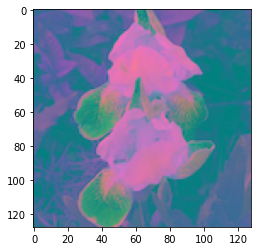

In [ ]:
lab(1)

In [ ]:
def ab(n):
  pastaCINZA = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/flowers/cinza")
  pastaAB = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/flowers/ab")

  imagemI = cv2.imread(os.path.join(pasta,arquivo[n]))
  imagemLAB = cv2.cvtColor(imagemI, cv2.COLOR_BGR2LAB)
  
  formato = imagemLAB[:,:,0].shape
  fill = np.zeros(formato)
  imagemAB = imagemLAB
  imagemCINZA = imagemLAB

  imagemAB[:,:,0] = fill
  imagemCINZA[:,:,1] = fill
  imagemCINZA[:,:,2] = fill

  imagemCINZA = cv2.cvtColor(imagemCINZA, cv2.COLOR_LAB2BGR)
  #imagemAB = cv2.cvtColor(imagemAB, cv2.COLOR_LAB2BGR)

  #cv2.imwrite("{}".format(os.path.join(pastaCINZA,arquivo[n])),imagemCINZA)
  #cv2.imwrite("{}".format(os.path.join(pastaAB,arquivo[n])),imagemAB)
  plt.imshow(imagemCINZA)
  plt.show()
  


[[[ 85 107 156]
  [ 84 108 155]
  [ 75 111 151]
  ...
  [ 86 118 143]
  [ 63 120 139]
  [ 45 121 137]]

 [[ 87 107 155]
  [ 91 106 157]
  [ 88 106 156]
  ...
  [ 82 117 143]
  [ 65 119 140]
  [ 47 121 137]]

 [[ 88 116 151]
  [ 97 115 154]
  [ 91 110 154]
  ...
  [ 68 119 141]
  [ 54 120 138]
  [ 47 120 137]]

 ...

 [[ 19 137 122]
  [ 29 143 122]
  [ 32 147 120]
  ...
  [198 128 128]
  [194 128 128]
  [188 127 128]]

 [[ 35 146 120]
  [ 38 149 120]
  [ 37 149 120]
  ...
  [196 128 128]
  [196 128 128]
  [194 128 128]]

 [[ 45 152 117]
  [ 46 152 119]
  [ 40 149 120]
  ...
  [186 129 128]
  [192 129 128]
  [195 128 128]]]


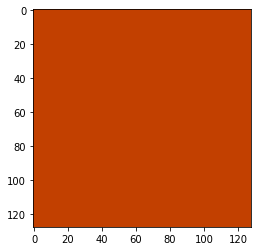

In [ ]:
ab(1)

In [ ]:
def teste(n):
  np.set_printoptions(linewidth=200,threshold=sys.maxsize)
  fig = plt.figure(figsize = (20, 20))

  imagemi = cv2.imread(os.path.join(pasta,arquivo[n]))
  imagemcinza = cv2.cvtColor(imagemi, cv2.COLOR_BGR2GRAY)
  imagemlab = cv2.cvtColor(imagemi, cv2.COLOR_BGR2LAB)

  fig.add_subplot(1, 5, 1)
  plt.imshow(imagemi)

  l_channel,a_channel,b_channel = cv2.split(imagemlab)

  #l_channel = 255 - l_channel
  #a_channel = a_channel - 128
  #b_channel = b_channel - 128

  Reimagemlab = np.zeros((128,128,3))
  Reimagemlab[:,:,0] = l_channel
  Reimagemlab[:,:,1] = a_channel
  Reimagemlab[:,:,2] = b_channel

  Reimagemlab = np.uint8(Reimagemlab)
  imagemRGB = cv2.cvtColor(Reimagemlab, cv2.COLOR_LAB2BGR)
  

  fig.add_subplot(1, 5, 2)
  plt.imshow(l_channel)
  fig.add_subplot(1, 5, 3)
  plt.imshow(a_channel)
  fig.add_subplot(1, 5, 4)
  plt.imshow(b_channel)
  fig.add_subplot(1, 5, 5)
  plt.imshow(imagemRGB)

  # Print the minimum and maximum of grayscale.
  print(np.min(imagemcinza),np.max(imagemcinza))

  # Print the minimum and maximum of lightness.
  print(np.min(l_channel),np.max(l_channel))

  # Print the minimum and maximum of a.
  print(np.min(a_channel),np.max(a_channel))

  # Print the minimum and maximum of b.
  print(np.min(b_channel),np.max(b_channel))
  print()

0 250
0 252
80 195
106 208



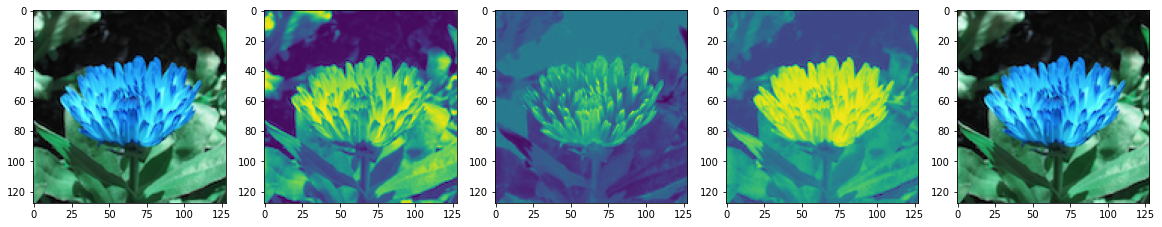

In [ ]:
teste(5)

SyntaxError: ignored

# Descolorizador

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

try:
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/L")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/A")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/B")
except:
    print("Pastas base criadas")
    pass

try:
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/train")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/train/L")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/train/A")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/train/B")
    print("Pastas train criadas")
except:
    pass  
try:
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/val")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/val/L")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/val/A")
    os.mkdir("/content/drive/My Drive/Colab Notebooks/flor/flowers/val/B")
    print("Pastas val criadas")
except:
    pass


L_train_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/train/L/")
A_train_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/train/A/")
B_train_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/train/B/")

L_val_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/val/L/")
A_val_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/val/A/")
B_val_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/val/B/")

L_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/L/")
A_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/A/")
B_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/B/")

LAB_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/LAB/")
original_pasta = os.path.join("/content/drive/My Drive/Colab Notebooks/flor/flowers/flowers/")

L_train_arquivo = os.listdir(L_train_pasta)
A_train_arquivo = os.listdir(A_train_pasta)
B_train_arquivo = os.listdir(B_train_pasta)

L_val_arquivo = os.listdir(L_val_pasta)
A_val_arquivo = os.listdir(A_val_pasta)
B_val_arquivo = os.listdir(B_val_pasta)

L_arquivo = os.listdir(L_pasta)
A_arquivo = os.listdir(A_pasta)
B_arquivo = os.listdir(B_pasta)

LAB_arquivo = os.listdir(LAB_pasta)
original_arquivo = os.listdir(original_pasta)

print(len(original_arquivo))

Pastas base criadas


FileNotFoundError: ignored

In [ ]:
import random
train = random.sample(original_arquivo, int(len(original_arquivo)*0.84))


In [ ]:
i = 0

for flor in train:
  original_imagem = cv2.imread(os.path.join(original_pasta,flor))

  LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)
  GRAY_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2GRAY)

  GRAY_imagem = 255 - GRAY_imagem

  plt.imsave(L_train_pasta + flor, GRAY_imagem, cmap = plt.cm.binary)

  A_imagem = LAB_imagem[:,:,1]
  A_imagem = A_imagem - 128
  A_imagem = 255 - A_imagem
  plt.imsave(A_train_pasta + flor, A_imagem, cmap = plt.cm.binary)

  B_imagem = LAB_imagem[:,:,2]
  B_imagem = B_imagem - 128
  B_imagem = B_imagem
  plt.imsave(B_train_pasta + flor, B_imagem, cmap = plt.cm.binary)

  i+= 1
  if i % int(len(original_arquivo)/10) == 0:
    print(str(int(i/int(len(train)/10)*10)) + "% completos")

L_train_arquivo = os.listdir(L_train_pasta)
A_train_arquivo = os.listdir(A_train_pasta)
B_train_arquivo = os.listdir(B_train_pasta)

print("Foram criados {} arquivos L_train".format(len(L_train_arquivo)))
print("Foram criados {} arquivos A_train".format(len(A_train_arquivo)))
print("Foram criados {} arquivos B_train".format(len(B_train_arquivo)))

2% completos
4% completos
7% completos
9% completos
12% completos
14% completos
16% completos
19% completos
21% completos
24% completos
26% completos
28% completos
31% completos
33% completos
36% completos
38% completos
40% completos
43% completos
45% completos
48% completos
50% completos
52% completos
55% completos
57% completos
60% completos
62% completos
64% completos
67% completos
69% completos
72% completos
74% completos
76% completos
79% completos
81% completos
84% completos
86% completos
88% completos
91% completos
93% completos
96% completos
98% completos
100% completos
Foram criados 0 arquivos L_train
Foram criados 0 arquivos A_train
Foram criados 0 arquivos B_train


In [ ]:
i = 0

for flor in original_arquivo:
  if flor not in train:
    original_imagem = cv2.imread(os.path.join(original_pasta,flor))

    LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)
    GRAY_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2GRAY)

    GRAY_imagem = 255 - GRAY_imagem

    plt.imsave(L_val_pasta + flor, GRAY_imagem, cmap = plt.cm.binary)

    A_imagem = LAB_imagem[:,:,1]
    A_imagem = A_imagem - 128
    A_imagem = 255 - A_imagem
    plt.imsave(A_val_pasta + flor, A_imagem, cmap = plt.cm.binary)

    B_imagem = LAB_imagem[:,:,2]
    B_imagem = B_imagem - 128
    plt.imsave(B_val_pasta + flor, B_imagem, cmap = plt.cm.binary)

    i+= 1
    if i % int(len(original_arquivo)/10) == 0:
      print(str(int(i/int((len(original_arquivo)-len(train))/10)*10)) + "% completos")

L_val_arquivo = os.listdir(L_val_pasta)
A_val_arquivo = os.listdir(A_val_pasta)
B_val_arquivo = os.listdir(B_val_pasta)

print("Foram criados {} arquivos L_val".format(len(L_val_arquivo)))
print("Foram criados {} arquivos A_val".format(len(A_val_arquivo)))
print("Foram criados {} arquivos B_val".format(len(B_val_arquivo)))

66% completos
Foram criados 0 arquivos L_val
Foram criados 0 arquivos A_val
Foram criados 0 arquivos B_val


In [ ]:
i = 0

for flor in original_arquivo:
  original_imagem = cv2.imread(os.path.join(original_pasta,flor))

  LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)
  GRAY_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2GRAY)

  GRAY_imagem = 255 - GRAY_imagem

  plt.imsave(L_pasta + flor, GRAY_imagem, cmap = plt.cm.binary)

  A_imagem = LAB_imagem[:,:,1]
  A_imagem = A_imagem - 128
  A_imagem = 255 - A_imagem
  plt.imsave(A_pasta + flor, A_imagem, cmap = plt.cm.binary)

  B_imagem = LAB_imagem[:,:,2]
  B_imagem = B_imagem - 128
  plt.imsave(B_pasta + flor, B_imagem, cmap = plt.cm.binary)

  i+= 1
  if i % int(len(original_arquivo)/10) == 0:
    print(str(int(i/int(len(original_arquivo)/10)*10)) + "% completos")

L_arquivo = os.listdir(L_pasta)
A_arquivo = os.listdir(A_pasta)
B_arquivo = os.listdir(B_pasta)

print("Foram criados {} arquivos L".format(len(L_arquivo)))
print("Foram criados {} arquivos A".format(len(A_arquivo)))
print("Foram criados {} arquivos B".format(len(B_arquivo)))

10% completos
20% completos
30% completos
40% completos
50% completos
60% completos
70% completos
80% completos
90% completos
100% completos
Foram criados 0 arquivos L
Foram criados 0 arquivos A
Foram criados 0 arquivos B


In [ ]:
def compara(n):
  fig = plt.figure(figsize = (16, 16))
 
  original_imagem = cv2.imread(os.path.join(original_pasta,original_arquivo[n]))
  fig.add_subplot(1, 4, 1)
  plt.imshow(original_imagem)

  L_imagem = cv2.imread(os.path.join(L_pasta,L_arquivo[n]))
  fig.add_subplot(1, 4, 2)
  plt.imshow(L_imagem)

  LAB_imagem = cv2.imread(os.path.join(LAB_pasta,LAB_arquivo[n]))
  fig.add_subplot(1, 4, 3)
  plt.imshow(LAB_imagem)

  RGB_imagem = cv2.cvtColor(LAB_imagem, cv2.COLOR_LAB2BGR)
  fig.add_subplot(1, 4, 4)
  plt.imshow(RGB_imagem)

  plt.show()

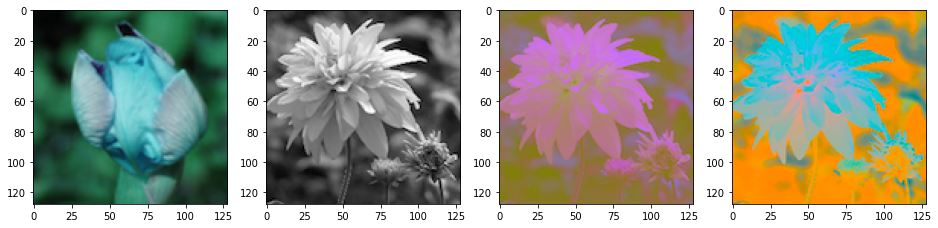

In [ ]:
compara(1)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def compara2(n):
  fig = plt.figure(figsize = (20, 20))
 
  original_imagem = cv2.imread(os.path.join(original_pasta,original_arquivo[n]))
  fig.add_subplot(1, 5, 1)
  plt.imshow(original_imagem)

  LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)

  #L_imagem = LAB_imagem[:,:,0]

  #L_imagem = cv2.imread(os.path.join(L_pasta,L_arquivo[n]))
  #L_imagem = 255 - L_imagem[:,:,0] 

  L_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2GRAY)

  fig.add_subplot(1, 5, 2)
  plt.imshow(L_imagem, cmap = plt.cm.binary)

  A_imagem = LAB_imagem[:,:,1]
  fig.add_subplot(1, 5, 3)
  plt.imshow(A_imagem)

  B_imagem = LAB_imagem[:,:,2]
  fig.add_subplot(1, 5, 4)
  plt.imshow(B_imagem)

  reLAB_imagem = np.zeros(original_imagem.shape)

  reLAB_imagem[:,:,0] = L_imagem 
  reLAB_imagem[:,:,1] = A_imagem 
  reLAB_imagem[:,:,2] = B_imagem 
  reLAB_imagem = np.uint8(reLAB_imagem)

  reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)
  fig.add_subplot(1, 5, 5)
  plt.imshow(reRGB_imagem)

  plt.show()

In [ ]:
compara2(5)

NameError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
def compara3(n):

  fig = plt.figure(figsize = (20, 20))
 
  original_imagem = cv2.imread(os.path.join(original_pasta,original_arquivo[n]))
  fig.add_subplot(1, 5, 1)
  plt.imshow(original_imagem)

  L_imagem = cv2.imread(os.path.join(L_pasta,L_arquivo[n]))
  L_imagem = L_imagem[:,:,0] 
  fig.add_subplot(1, 5, 2)
  plt.imshow(L_imagem, cmap = plt.cm.binary)

  A_imagem = cv2.imread(os.path.join(A_pasta,A_arquivo[n]))
  A_imagem = A_imagem[:,:,0] - 128

  fig.add_subplot(1, 5, 3)
  plt.imshow(A_imagem, cmap = plt.cm.RdPu)

  B_imagem = cv2.imread(os.path.join(B_pasta,B_arquivo[n]))
  B_imagem = B_imagem[:,:,0] - 128

  fig.add_subplot(1, 5, 4)
  plt.imshow(B_imagem, cmap = plt.cm.YlGn)

  reLAB_imagem = np.zeros(original_imagem.shape)

  reLAB_imagem[:,:,0] = L_imagem 
  reLAB_imagem[:,:,1] = A_imagem
  reLAB_imagem[:,:,2] = B_imagem
  reLAB_imagem = np.uint8(reLAB_imagem)

  reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)
  fig.add_subplot(1, 5, 5)
  plt.imshow(reRGB_imagem)

  plt.show()

In [ ]:
compara3(1)

NameError: ignored

<Figure size 1440x1440 with 0 Axes>

# Rede Neural

In [ ]:
x_train_list = []
y_train_list = []
x_val_list = []
y_val_list = []

for x in L_train_arquivo:
    original_imagem = cv2.imread(os.path.join(L_train_pasta,x))
    LL = np.zeros((128,128,1))
    LL[:,:,0] = original_imagem[:,:,0]
    x_train_list.append(LL)
print("L_train")
for a in A_train_arquivo:
    original_imagem_a = cv2.imread(os.path.join(A_train_pasta,a))
    original_imagem_b = cv2.imread(os.path.join(B_train_pasta,a))
    
    AB = np.zeros((128,128,2))
    AB[:,:,0] = original_imagem_a[:,:,0]
    AB[:,:,1] = original_imagem_b[:,:,0]
    y_train_list.append(AB)
print("AB_train")
for x in L_val_arquivo:
    original_imagem = cv2.imread(os.path.join(L_val_pasta,x))
    LL = np.zeros((128,128,1))
    LL[:,:,0] = original_imagem[:,:,0]
    x_val_list.append(LL)
print("L_val")
for a in A_val_arquivo:
    original_imagem_a = cv2.imread(os.path.join(A_val_pasta,a))
    original_imagem_b = cv2.imread(os.path.join(B_val_pasta,a))
    
    AB = np.zeros((128,128,2))
    AB[:,:,0] = original_imagem_a[:,:,0]
    AB[:,:,1] = original_imagem_b[:,:,0]
    y_val_list.append(AB)
print("AB_val")

L_train
AB_train
L_val
AB_val


In [ ]:
x_train = np.array(x_train_list)
y_train = np.array(y_train_list)
x_val = np.array(x_val_list)
y_val = np.array(y_val_list)

x_train = x_train / 255.0
y_train = y_train / 255.0
x_val = x_val / 255.0
y_val = y_val / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(506, 128, 128, 1)
(506, 128, 128, 2)
(97, 128, 128, 1)
(97, 128, 128, 2)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same", input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"), 
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),

    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"), 

    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(2, (3,3), activation = 'sigmoid', padding = "same") 
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 128, 128, 24)      240       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 128, 128, 24)      5208      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 128, 128, 24)      5208      
_________________________________________________________________
layer_normalization_21 (Laye (None, 128, 128, 24)      786432    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 24)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 64, 64, 48)        10416     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 64, 64, 48)       

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ['MSE'])

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val,y_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 5)

Epoch 1/5
100/100 [==============================] - 10s 102ms/step - loss: 0.6152 - MSE: 0.1497 - val_loss: 0.6152 - val_MSE: 0.1519
Epoch 2/5
100/100 [==============================] - 10s 99ms/step - loss: 0.5958 - MSE: 0.1410 - val_loss: 0.6141 - val_MSE: 0.1508
Epoch 3/5
100/100 [==============================] - 9s 94ms/step - loss: 0.5902 - MSE: 0.1383 - val_loss: 0.6164 - val_MSE: 0.1525
Epoch 4/5
100/100 [==============================] - 9s 93ms/step - loss: 0.5861 - MSE: 0.1372 - val_loss: 0.6143 - val_MSE: 0.1515
Epoch 5/5
100/100 [==============================] - 9s 94ms/step - loss: 0.5843 - MSE: 0.1350 - val_loss: 0.6138 - val_MSE: 0.1513


Saving 00_009.png to 00_009.png
Saving 00_032.png to 00_032 (1).png
Saving 01_009.png to 01_009.png
Saving 01_026.png to 01_026.png
Saving 02_022.png to 02_022.png
255.0 0.0
75.56615 -43.284737
-20.35431 -108.80536
255.0 0.0
75.49899 -42.589912
-23.080154 -107.609085
255.0 0.0
77.304535 -41.110817
-14.6783905 -110.061295
255.0 0.0
70.581314 -42.282417
-24.253723 -110.213196
255.0 0.0
74.47829 -41.66169
-27.612839 -110.592865


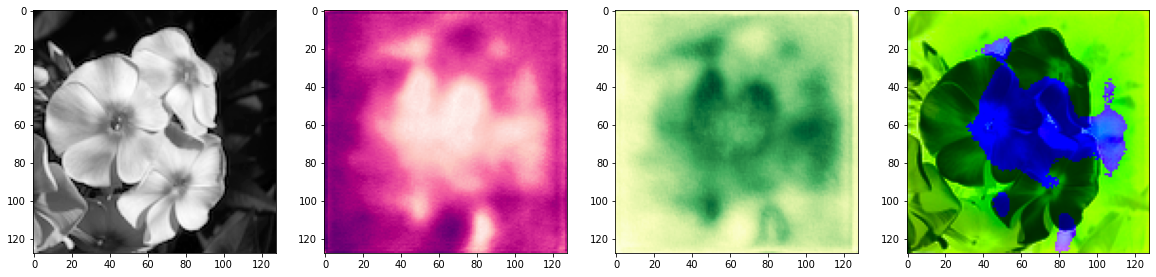

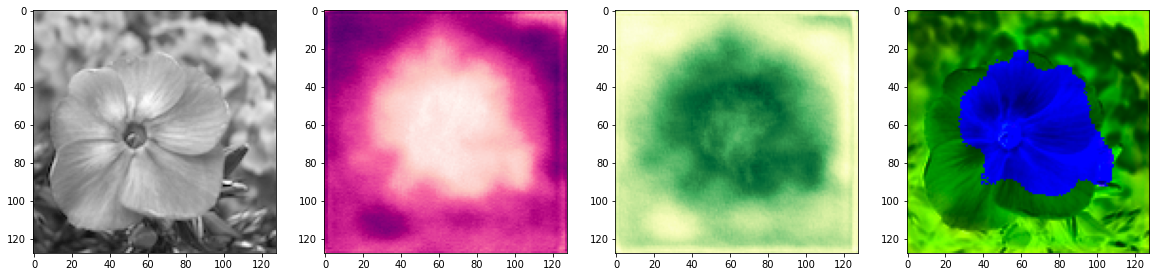

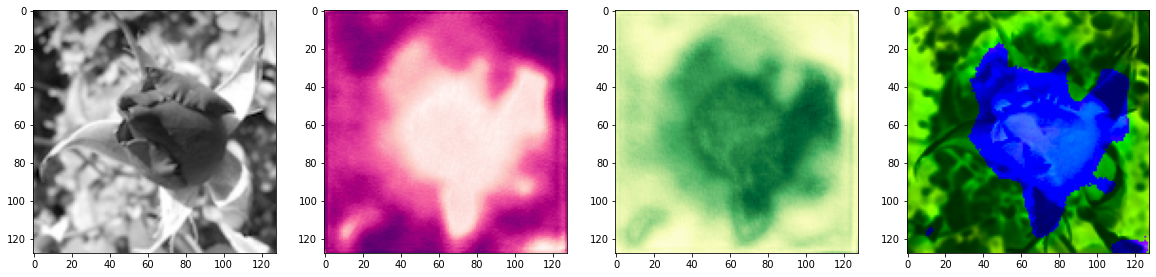

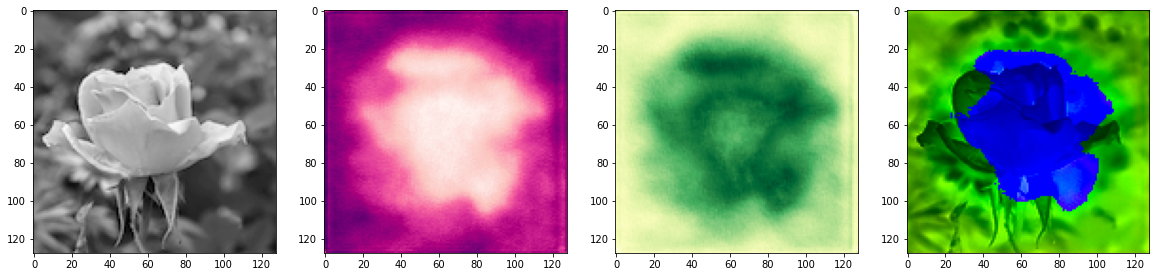

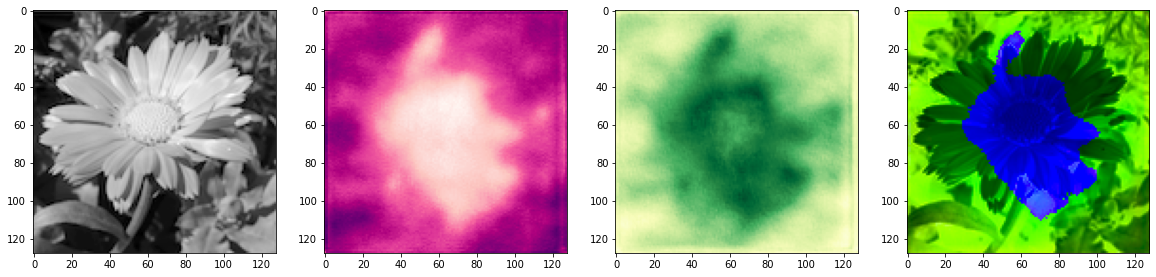

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  original = cv2.imread(path)
  L_imagem = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  L_imagem = 255 - L_imagem
  L_imagem = L_imagem / 255.0
  L_imagem = np.reshape(L_imagem,(1,128,128,1))
  AB_imagem = model.predict(L_imagem)


  AB_imagem = np.reshape(AB_imagem, (128,128,2))
  A_imagem = AB_imagem[:,:,0]
  B_imagem = AB_imagem[:,:,1]
  A_imagem = A_imagem * 255.0
  A_imagem = A_imagem - 127
  B_imagem = B_imagem * 255.0
  B_imagem = 255 - B_imagem
  B_imagem = B_imagem - 127

  L_imagem = np.reshape(L_imagem,(128,128))
  L_imagem = L_imagem * 255.0

  reLAB_imagem = np.zeros((128,128,3))

  reLAB_imagem[:,:,0] = L_imagem 
  reLAB_imagem[:,:,1] = A_imagem
  reLAB_imagem[:,:,2] = B_imagem

  print(np.max(L_imagem),np.min(L_imagem))
  print(np.max(A_imagem),np.min(A_imagem))
  print(np.max(B_imagem),np.min(B_imagem))

  reLAB_imagem = np.uint8(reLAB_imagem)
  reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

  fig = plt.figure(figsize = (20, 20))
  fig.add_subplot(1, 4, 1)
  plt.imshow(L_imagem, cmap = plt.cm.binary)
  fig.add_subplot(1, 4, 2)
  plt.imshow(A_imagem, cmap = plt.cm.RdPu)
  fig.add_subplot(1, 4, 3)
  plt.imshow(B_imagem, cmap = plt.cm.YlGn)
  fig.add_subplot(1, 4, 4)
  plt.imshow(reRGB_imagem)
  plt.show


  



In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:-2]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
L_imagems = [os.path.join(L_val_pasta, f) for f in L_val_arquivo]
img_path = random.choice(L_imagems)


img = load_img(img_path, target_size=(128, 128), color_mode = "grayscale")  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 1)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 1)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:-2]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
def teste(n):
    L_imagem = x_train[n,:,:,0]
    AB_imagem = y_train[n,:,:,:]


    AB_imagem = np.reshape(AB_imagem, (128,128,2))
    A_imagem = AB_imagem[:,:,0]
    B_imagem = AB_imagem[:,:,1]
    A_imagem = A_imagem * 255.0
    A_imagem = A_imagem - 128
    B_imagem = B_imagem * 255.0
    B_imagem = 255 - B_imagem
    B_imagem = B_imagem - 128

    L_imagem = np.reshape(L_imagem,(128,128))
    L_imagem = L_imagem * 255.0

    reLAB_imagem = np.zeros((128,128,3))

    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,1] = A_imagem
    reLAB_imagem[:,:,2] = B_imagem

    print(np.max(L_imagem),np.min(L_imagem))
    print(np.max(A_imagem),np.min(A_imagem))
    print(np.max(B_imagem),np.min(B_imagem))

    reLAB_imagem = np.uint8(reLAB_imagem)
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    fig = plt.figure(figsize = (20, 20))
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)
    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)
    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)
    fig.add_subplot(1, 4, 4)
    plt.imshow(reRGB_imagem)
    plt.show

255.0 0.0
127.0 -128.0
127.0 -128.0


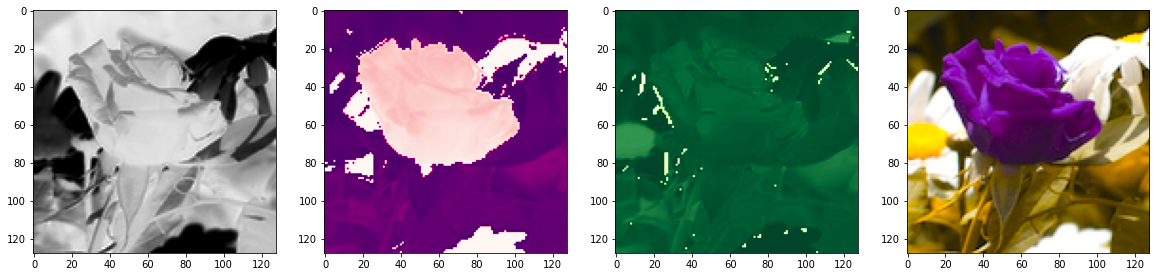

In [ ]:
teste(100)

# A e B separados

In [ ]:
x_train_list = []
yA_train_list = []
yB_train_list = []
x_val_list = []
yA_val_list = []
yB_val_list = []

for x in L_train_arquivo:
    original_imagem = cv2.imread(os.path.join(L_train_pasta,x))
    L = np.zeros((128,128,1))
    L[:,:,0] = original_imagem[:,:,0]
    x_train_list.append(L)
print("L_train")

for a in A_train_arquivo:
    original_imagem_a = cv2.imread(os.path.join(A_train_pasta,a))
    A = np.zeros((128,128,1))
    A[:,:,0] = original_imagem_a[:,:,0]
    yA_train_list.append(A)
print("A_train")

for b in B_train_arquivo:
    original_imagem_b = cv2.imread(os.path.join(B_train_pasta,b))
    B = np.zeros((128,128,1))
    B[:,:,0] = original_imagem_b[:,:,0]
    yB_train_list.append(B)
print("B_train")

for x in L_val_arquivo:
    original_imagem = cv2.imread(os.path.join(L_val_pasta,x))
    L = np.zeros((128,128,1))
    L[:,:,0] = original_imagem[:,:,0]
    x_val_list.append(L)
print("L_val")

for a in A_val_arquivo:
    original_imagem_a = cv2.imread(os.path.join(A_val_pasta,a))
    A = np.zeros((128,128,1))
    A[:,:,0] = original_imagem_a[:,:,0]
    yA_val_list.append(A)
print("A_val")

for b in B_val_arquivo:
    original_imagem_b = cv2.imread(os.path.join(B_val_pasta,b))
    B = np.zeros((128,128,1))
    B[:,:,0] = original_imagem_b[:,:,0]
    yB_val_list.append(B)
print("B_val")


L_train
A_train
B_train
L_val
A_val
B_val


In [ ]:
x_train = np.array(x_train_list)
yA_train = np.array(yA_train_list)
yB_train = np.array(yB_train_list)
x_val = np.array(x_val_list)
yA_val = np.array(yA_val_list)
yB_val = np.array(yB_val_list)

print("x_train",np.min(x_train),np.max(x_train))
print("yA_train",np.min(yA_train),np.max(yA_train))
print("yB_train",np.min(yB_train),np.max(yB_train))
print("x_val",np.min(x_val),np.max(x_val))
print("yA_val",np.min(yA_val),np.max(yA_val))
print("yB_val",np.min(yB_val),np.max(yB_val))

x_train = x_train / 255.0
yA_train = yA_train / 255.0
yB_train = yB_train / 255.0
x_val = x_val / 255.0
yA_val = yA_val / 255.0
yB_val = yB_val / 255.0

print(x_train.shape)
print(yA_train.shape)
print(yB_train.shape)
print(x_val.shape)
print(yA_val.shape)
print(yB_val.shape)

x_train 0.0 255.0
yA_train 0.0 255.0
yB_train 0.0 255.0
x_val 0.0 255.0
yA_val 0.0 255.0
yB_val 0.0 255.0
(506, 128, 128, 1)
(506, 128, 128, 1)
(506, 128, 128, 1)
(97, 128, 128, 1)
(97, 128, 128, 1)
(97, 128, 128, 1)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
modelA = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(48, (3,3), activation = 'relu', padding = "same", input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'relu', padding = "same"),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),

    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.LayerNormalization(axis = [1,2]),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    #tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.UpSampling2D((2,2)),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(20, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(1, (3,3), activation = 'tanh', padding = "same")  
])

modelA.compile(
    optimizer = "RMSprop",
    loss = "MSLE",
    metrics = ['MSLE'])

historyA = modelA.fit(
    x = x_train,
    y = yA_train,
    validation_data = (x_val,yA_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 10)

Epoch 1/10
100/100 [==============================] - 4s 38ms/step - loss: 0.1231 - MSLE: 0.1231 - val_loss: 0.1008 - val_MSLE: 0.1008
Epoch 2/10
100/100 [==============================] - 4s 40ms/step - loss: 0.0843 - MSLE: 0.0843 - val_loss: 0.0908 - val_MSLE: 0.0908
Epoch 3/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0815 - MSLE: 0.0815 - val_loss: 0.0978 - val_MSLE: 0.0978
Epoch 4/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0790 - MSLE: 0.0790 - val_loss: 0.0935 - val_MSLE: 0.0935
Epoch 5/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0785 - MSLE: 0.0785 - val_loss: 0.0950 - val_MSLE: 0.0950
Epoch 6/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0771 - MSLE: 0.0771 - val_loss: 0.0945 - val_MSLE: 0.0945
Epoch 7/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0765 - MSLE: 0.0765 - val_loss: 0.0967 - val_MSLE: 0.0967
Epoch 8/10
100/100 [==============================] - 3

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
modelB = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(48, (3,3), activation = 'relu', padding = "same", input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'relu', padding = "same"),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),

    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"), 
    #tf.keras.layers.LayerNormalization(axis = [1,2]),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    #tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.UpSampling2D((2,2)),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(20, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(1, (3,3), activation = 'sigmoid', padding = "same") 
])

modelB.compile(
    optimizer = "adam",
    loss = "MSLE",
    metrics = ['MSLE'])

historyB = modelB.fit(
    x = x_train,
    y = yB_train,
    validation_data = (x_val,yB_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 10)

Epoch 1/10
100/100 [==============================] - 3s 32ms/step - loss: 0.0554 - MSLE: 0.0554 - val_loss: 0.0611 - val_MSLE: 0.0611
Epoch 2/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0516 - MSLE: 0.0516 - val_loss: 0.0586 - val_MSLE: 0.0586
Epoch 3/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0492 - MSLE: 0.0492 - val_loss: 0.0623 - val_MSLE: 0.0623
Epoch 4/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0519 - MSLE: 0.0519 - val_loss: 0.0600 - val_MSLE: 0.0600
Epoch 5/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0500 - MSLE: 0.0500 - val_loss: 0.0627 - val_MSLE: 0.0627
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0496 - MSLE: 0.0496 - val_loss: 0.0668 - val_MSLE: 0.0668
Epoch 7/10
100/100 [==============================] - 3s 30ms/step - loss: 0.0491 - MSLE: 0.0491 - val_loss: 0.0616 - val_MSLE: 0.0616
Epoch 8/10
100/100 [==============================] - 3

In [ ]:
import random
def predict(n):
    L_imagem = x_val[n,:,:,0]

    L_imagem = 255 - L_imagem
    L_imagem = L_imagem / 255.0
    L_imagem = np.reshape(L_imagem,(1,128,128,1))
    A_imagem = modelA.predict(L_imagem)
    B_imagem = modelB.predict(L_imagem)


    A_imagem = np.reshape(A_imagem, (128,128,1))
    B_imagem = np.reshape(B_imagem, (128,128,1))

    A_imagem = A_imagem * 255.0
    A_imagem = 255 - A_imagem
    A_imagem = A_imagem - 127
    
    B_imagem = B_imagem * 255.0 
    #B_imagem = 255 - B_imagem
    B_imagem = B_imagem - 127

    L_imagem = np.reshape(L_imagem,(128,128))
    L_imagem = L_imagem * 255.0

    A_imagem = np.reshape(A_imagem,(128,128))
    B_imagem = np.reshape(B_imagem,(128,128))

    reLAB_imagem = np.zeros((128,128,3))
    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,2] = A_imagem
    reLAB_imagem[:,:,1] = B_imagem

    print("L: ",np.max(L_imagem),np.min(L_imagem))
    print("A: ",np.max(A_imagem),np.min(A_imagem))
    print("B: ",np.max(B_imagem),np.min(B_imagem))

    reLAB_imagem = np.uint8(reLAB_imagem)
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    fig = plt.figure(figsize = (20, 20))
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)
    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)
    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)
    fig.add_subplot(1, 4, 4)
    plt.imshow(reRGB_imagem)
    plt.show

In [ ]:
def teste(n):
    L_imagem = x_val[n,:,:,0]
    A_imagem = yA_val[n,:,:,0]
    B_imagem = yB_val[n,:,:,0]

    A_imagem = np.reshape(A_imagem, (128,128))
    B_imagem = np.reshape(B_imagem, (128,128))

    A_imagem = A_imagem * 255.0
    A_imagem = 255 - A_imagem
    A_imagem = A_imagem - 128
    B_imagem = B_imagem * 255.0
    #B_imagem = 255 - B_imagem
    B_imagem = B_imagem - 128

    L_imagem = np.reshape(L_imagem,(128,128))
    L_imagem = L_imagem * 255.0

    reLAB_imagem = np.zeros((128,128,3))

    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,1] = B_imagem
    reLAB_imagem[:,:,2] = A_imagem

    print("L: ",np.max(L_imagem),np.min(L_imagem))
    print("A: ",np.max(A_imagem),np.min(A_imagem))
    print("B: ",np.max(B_imagem),np.min(B_imagem))

    reLAB_imagem = np.uint8(reLAB_imagem)
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    fig = plt.figure(figsize = (20, 20))
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)
    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)
    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)
    fig.add_subplot(1, 4, 4)
    plt.imshow(reRGB_imagem)
    plt.show

L:  255.0 254.0
A:  65.010025 -66.40863
B:  103.18622 -4.7830505
L:  255.0 254.0
A:  65.02371 -66.45712
B:  103.202545 -4.7674255
L:  255.0 254.0
A:  65.034546 -66.44647
B:  103.200134 -4.7844543
L:  255.0 254.0
A:  64.99994 -66.46486
B:  103.14017 -4.812355
L:  255.0 254.0
A:  65.034546 -66.44647
B:  103.200134 -4.7844543


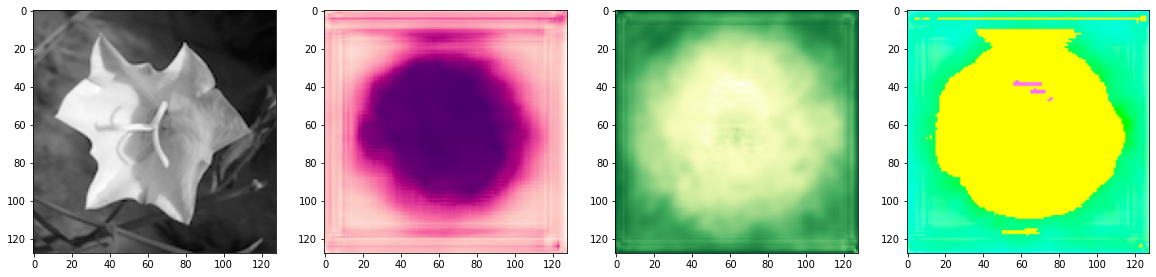

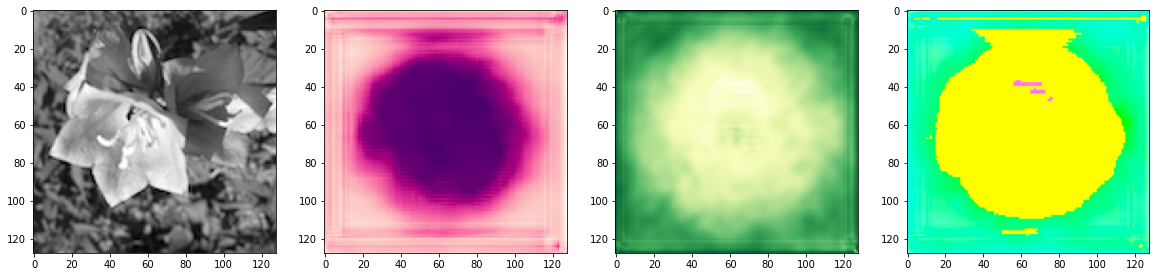

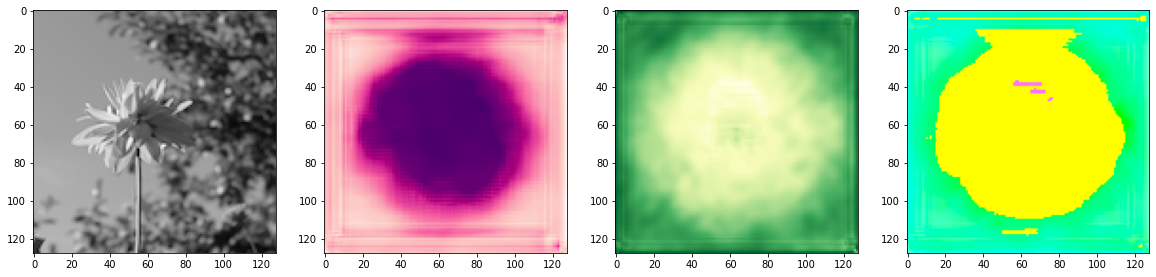

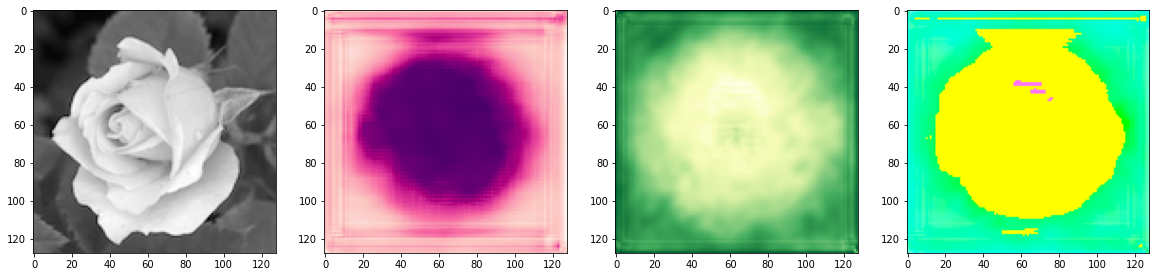

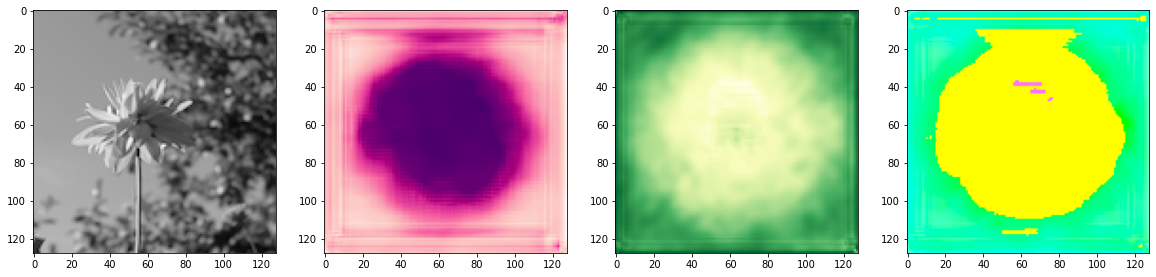

In [ ]:
import random
for a in range(0,5):
    i = random.choice(range(0,len(L_val_arquivo)))
    predict(i)

L:  255.0 0.0
A:  127.0 -128.0
B:  127.0 -128.0
L:  255.0 0.0
A:  127.0 -128.0
B:  127.0 -128.0
L:  255.0 0.0
A:  127.0 -128.0
B:  127.0 -128.0
L:  255.0 0.0
A:  127.0 -128.0
B:  127.0 -128.0
L:  255.0 0.0
A:  127.0 -128.0
B:  127.0 -128.0


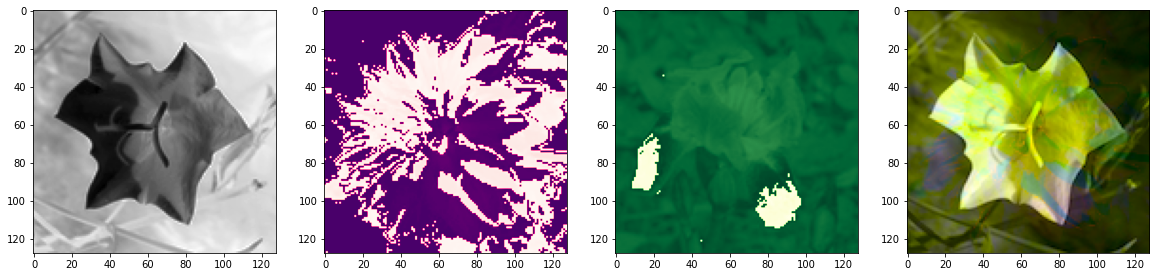

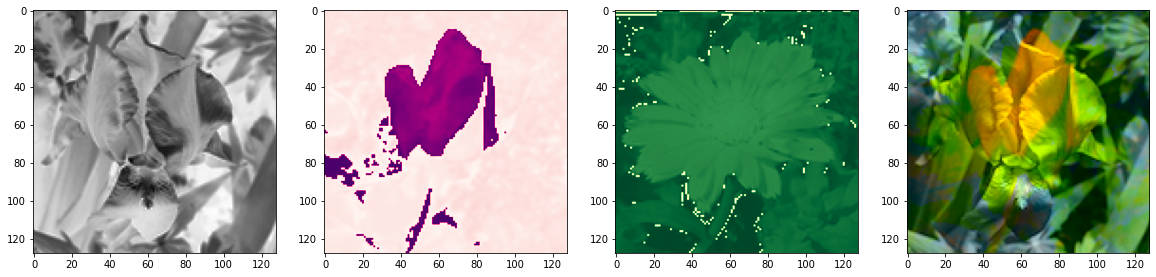

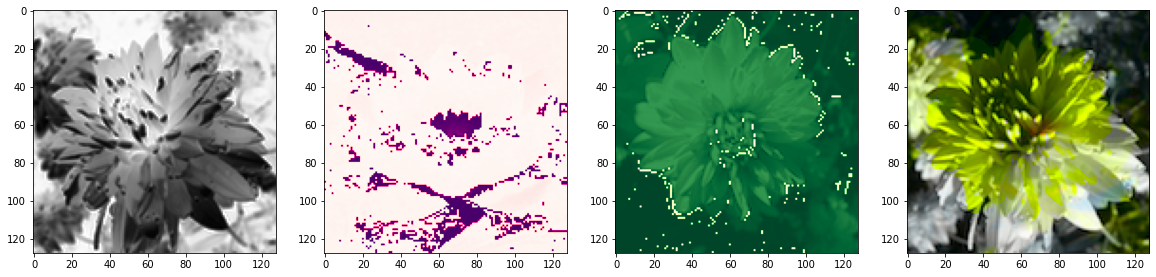

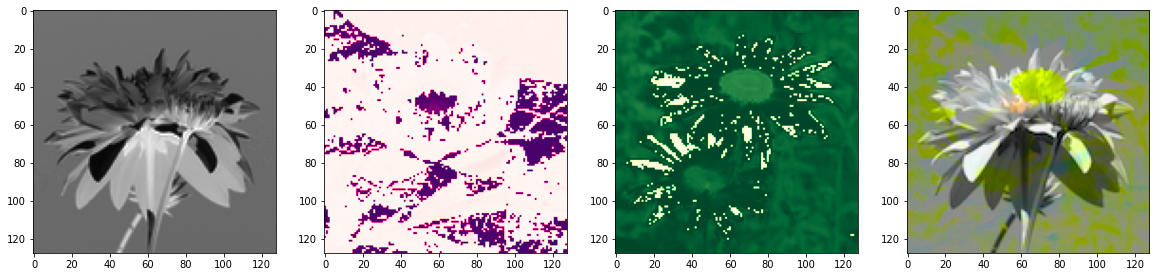

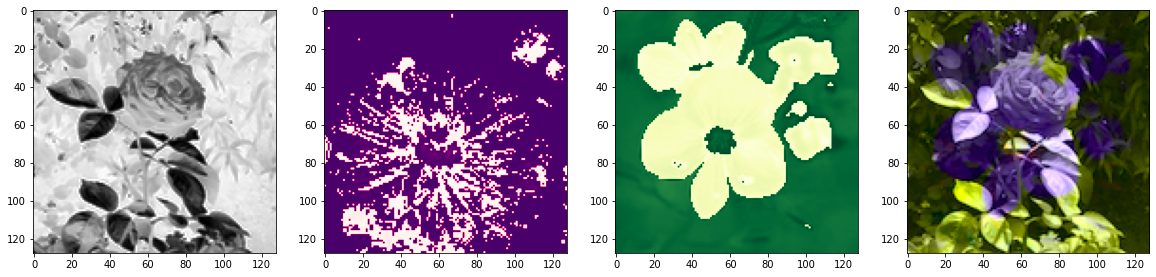

In [ ]:
import random
for a in range(0,5):
    i = random.choice(range(0,len(L_val_arquivo)))
    teste(i)

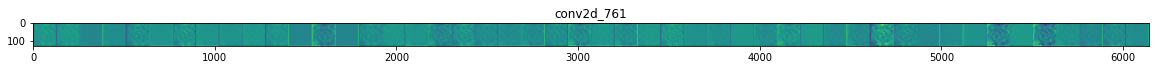

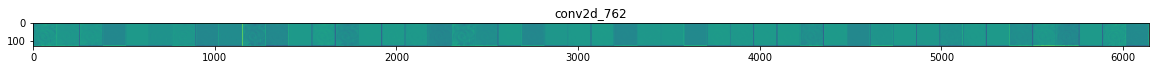

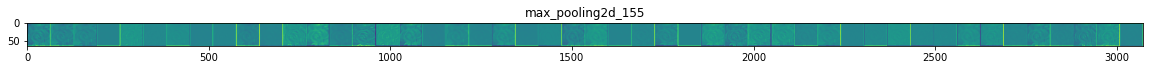

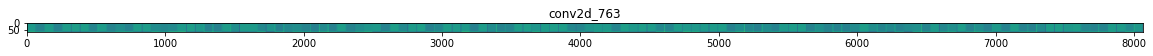

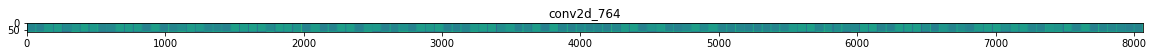

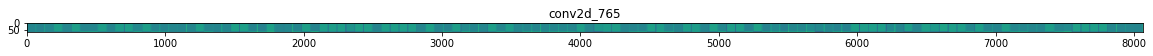

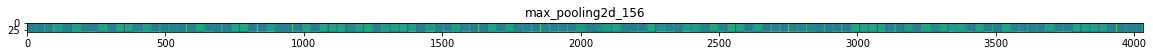

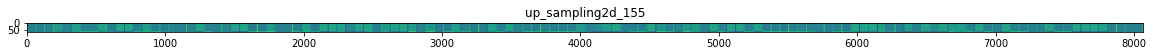

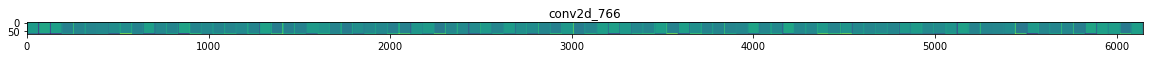

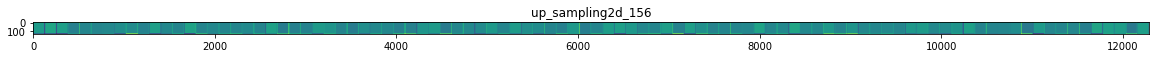

In [ ]:
=import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in modelA.layers[1:-2]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = modelA.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
L_imagems = [os.path.join(L_val_pasta, f) for f in L_val_arquivo]
img_path = random.choice(L_imagems)


img = load_img(img_path, target_size=(128, 128), color_mode = "grayscale")  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in modelA.layers[1:-2]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Saving 03_030.png to 03_030.png
255.0 0.0
73.4995 -4.6553116
119.11977 4.169037


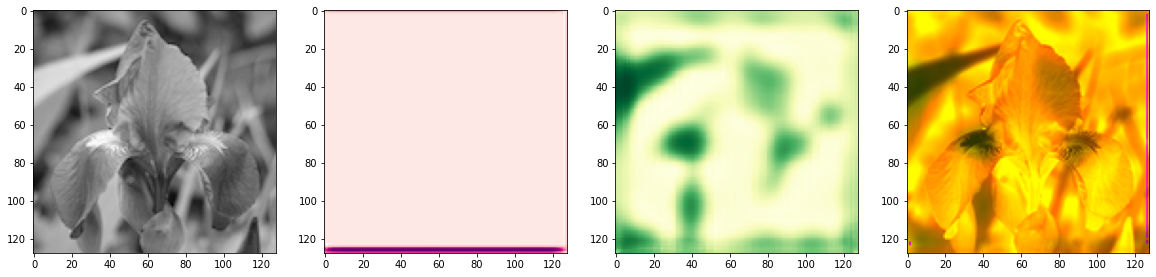

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  original = cv2.imread(path)
  L_imagem = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  L_imagem = 255 - L_imagem
  L_imagem = L_imagem / 255.0
  L_imagem = np.reshape(L_imagem,(1,128,128,1))
  A_imagem = modelA.predict(L_imagem)
  B_imagem = modelB.predict(L_imagem)


  A_imagem = np.reshape(A_imagem, (128,128,1))
  B_imagem = np.reshape(B_imagem, (128,128,1))

  A_imagem = A_imagem * 255.0
  A_imagem = A_imagem - 127
  
  B_imagem = B_imagem * 255.0
  B_imagem = 255 - B_imagem
  B_imagem = B_imagem - 127

  L_imagem = np.reshape(L_imagem,(128,128))
  L_imagem = L_imagem * 255.0

  A_imagem = np.reshape(A_imagem,(128,128))
  B_imagem = np.reshape(B_imagem,(128,128))

  reLAB_imagem = np.zeros((128,128,3))
  reLAB_imagem[:,:,0] = L_imagem 
  reLAB_imagem[:,:,1] = A_imagem
  reLAB_imagem[:,:,2] = B_imagem

  print(np.max(L_imagem),np.min(L_imagem))
  print(np.max(A_imagem),np.min(A_imagem))
  print(np.max(B_imagem),np.min(B_imagem))

  reLAB_imagem = np.uint8(reLAB_imagem)
  reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

  fig = plt.figure(figsize = (20, 20))
  fig.add_subplot(1, 4, 1)
  plt.imshow(L_imagem, cmap = plt.cm.binary)
  fig.add_subplot(1, 4, 2)
  plt.imshow(A_imagem, cmap = plt.cm.RdPu)
  fig.add_subplot(1, 4, 3)
  plt.imshow(B_imagem, cmap = plt.cm.YlGn)
  fig.add_subplot(1, 4, 4)
  plt.imshow(reRGB_imagem)
  plt.show


  



# Otra Rede


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    fill_mode=  'nearest',
) 
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)


In [ ]:
x_train = train_datagen.flow_from_directory(
    L_train_pasta,
    color_mode = "grayscale",
    target_size = (128,128),
    class_mode = "input"
)

yA_train = train_datagen.flow_from_directory(
    A_train_pasta,
    color_mode = "grayscale",
    target_size = (128,128),
    class_mode = "input"
)

yB_train = train_datagen.flow_from_directory(
    B_train_pasta,
    color_mode = "grayscale",
    target_size = (128,128),
    class_mode = "input"
)

x_val = validation_datagen.flow_from_directory(
    L_val_pasta,
    color_mode = "grayscale",
    target_size = (128,128),
    class_mode = "input"
)

yA_val = validation_datagen.flow_from_directory(
    A_val_pasta,
    color_mode = "grayscale",
    target_size = (128,128),
    class_mode = "input"
)

yB_val = validation_datagen.flow_from_directory(
    B_val_pasta,
    color_mode = "grayscale",
    target_size = (128,128),
    class_mode = "input"
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
modelA = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same", input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"), 
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(48, (3,3), activation = 'sigmoid', padding = "same"), 
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.LayerNormalization(axis=[1, 2, 3]),
    tf.keras.layers.Conv2D(24, (3,3), activation = 'sigmoid', padding = "same"),
    tf.keras.layers.Conv2D(2, (3,3), activation = 'sigmoid', padding = "same") 
])

In [ ]:
modelA.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ['MSE'])

In [ ]:
historyA = modelA.fit(
    x = x_train,
    y = yA_train,
    validation_data = (x_val,yA_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 5)


ValueError: ignored

In [ ]:
historyB = modelA.fit(
    x = x_train,
    y = yB_train,
    validation_data = (x_val,yB_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 5)